### Import the required packages 

In [1]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler 

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt     

from tensorflow import keras
from sklearn.preprocessing import StandardScaler 
#import plotly.graph_objects as go

from sklearn.ensemble import IsolationForest  

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed 
import seaborn as sns #visualisation
 

### Read data 

In [104]:
# import data set from the local driver 
df=pd.read_csv('SWaT_Dataset_Attack_v0 - Copy.csv', parse_dates = ['Timestamp'], index_col = 'Timestamp')
dff=pd.read_csv('SWaT_Dataset_Normal_v0.csv', parse_dates = ['Timestamp'], index_col = 'Timestamp') 
frames = [df,dff] 
df_concat=pd.concat(frames) 
df_concat.head(2) 

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-28 10:00:00,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
2015-12-28 10:00:01,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal


#### Automatic feature selection 

In [105]:
# df_concat.filter(regex=('^PIT' and '^LIT') ,axis=1).head() 
df1=df_concat.filter(regex='(^PIT|^AIT|^FIT|^DPI|^LIT|^Norma)',axis=1)#.head()
df1.head()

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-28 10:00:00,2.427057,522.8467,262.0161,8.396437,328.6337,2.445391,19.74838,2.206835,956.1651,148.808,...,12.03538,1.723789,1.279621,0.735269,0.307786,250.8652,1.649953,189.5988,0.000128,Normal
2015-12-28 10:00:01,2.446274,522.8860,262.0161,8.396437,328.6337,2.445391,19.74838,2.208244,956.1651,148.808,...,12.03538,1.723789,1.297554,0.735269,0.307786,250.8652,1.649953,189.6789,0.000128,Normal
2015-12-28 10:00:02,2.489191,522.8467,262.0161,8.394514,328.6337,2.442316,19.69076,2.208628,956.4855,148.808,...,12.03538,1.723404,1.293967,0.735269,0.308619,250.8812,1.649953,189.6789,0.000128,Normal
2015-12-28 10:00:03,2.534350,522.9645,262.0161,8.394514,328.6337,2.442316,19.69076,2.208628,956.8060,148.808,...,12.03538,1.723404,1.281158,0.735269,0.308619,250.8812,1.649953,189.6148,0.000128,Normal
2015-12-28 10:00:04,2.569260,523.4748,262.0161,8.394514,328.6337,2.443085,19.69076,2.208628,957.0864,148.808,...,12.03538,1.723404,1.281158,0.735269,0.308619,250.8812,1.649953,189.5027,0.000128,Normal


## Exploratory data analysis 

##### Dropping irrelevant columns

In [106]:
#If there are missing entries, drop them.
df1.dropna(inplace=True)#,axis=1)   

/tmp/ipykernel_102/97434306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)#,axis=1)


In [107]:
# Total number of rows and columns 
df1.shape 

(946719, 26)

In [108]:
# Rows containing duplicate data
duplicate_rows_df = df1[df1.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (17821, 26)


In [109]:
# Dropping the duplicates 
df1= df1.drop_duplicates()
df1.head(2)    

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-28 10:00:00,2.427057,522.8467,262.0161,8.396437,328.6337,2.445391,19.74838,2.206835,956.1651,148.808,...,12.03538,1.723789,1.279621,0.735269,0.307786,250.8652,1.649953,189.5988,0.000128,Normal
2015-12-28 10:00:01,2.446274,522.8860,262.0161,8.396437,328.6337,2.445391,19.74838,2.208244,956.1651,148.808,...,12.03538,1.723789,1.297554,0.735269,0.307786,250.8652,1.649953,189.6789,0.000128,Normal


In [110]:
# remove the space on Normal/Attack columns  
df1['Normal/Attack'] = df1['Normal/Attack'].str.replace(' ', '')    

In [111]:
# To see how the data is spread betwen Normal  and Attack 
print(df1.groupby('Normal/Attack')['Normal/Attack'].count())  

Normal/Attack
Attack     53648
Normal    875250
Name: Normal/Attack, dtype: int64


In [112]:
# Rename the col name Normal/Attack with A  
df1.rename(columns = {'Normal/Attack':'A'}, inplace = True)
df1.head(2) 

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,A
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-28 10:00:00,2.427057,522.8467,262.0161,8.396437,328.6337,2.445391,19.74838,2.206835,956.1651,148.808,...,12.03538,1.723789,1.279621,0.735269,0.307786,250.8652,1.649953,189.5988,0.000128,Normal
2015-12-28 10:00:01,2.446274,522.8860,262.0161,8.396437,328.6337,2.445391,19.74838,2.208244,956.1651,148.808,...,12.03538,1.723789,1.297554,0.735269,0.307786,250.8652,1.649953,189.6789,0.000128,Normal


In [113]:
# Convert non-numeric to numeric

df1.A[df1.A == 'Normal'] = 0 
df1.A[df1.A == 'Attack'] = 1     

/tmp/ipykernel_102/1824838866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.A[df1.A == 'Normal'] = 0
/tmp/ipykernel_102/1824838866.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.A[df1.A == 'Attack'] = 1


### Normalize numerical values using min max  

In [114]:
# # # For content length, use the Min max Scalar.  
# # from sklearn.preprocessing import MinMaxScaler 

# con_feats = ['FIT101','LIT101','AIT201','AIT202','AIT203','FIT201','DPIT301','FIT301','FIT301','LIT301','AIT401',
#             'AIT402','FIT401','LIT401','AIT501','AIT502','AIT503','AIT504','FIT501','FIT502','FIT503','FIT504',
#             'PIT501','PIT502','PIT503','FIT601'] 
# scaler = MinMaxScaler() 
# df1[con_feats] = scaler.fit_transform(df1[con_feats])
# df1.head()   

In [115]:
X = df1[['LIT101']]
motor_power = (X['LIT101'].values.reshape(-1,1))
model_isoforest = IsolationForest()
model_isoforest.fit(motor_power)
scores = model_isoforest.score_samples(motor_power)
X['anomaly_scores'] = model_isoforest.score_samples(motor_power)
X['anomaly_classification'] = model_isoforest.predict(X['LIT101'].values.reshape(-1,1))  

/tmp/ipykernel_102/1283640948.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['anomaly_scores'] = model_isoforest.score_samples(motor_power)
/tmp/ipykernel_102/1283640948.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['anomaly_classification'] = model_isoforest.predict(X['LIT101'].values.reshape(-1,1))


In [116]:
model_isoforest.fit(motor_power)
scores = model_isoforest.score_samples(motor_power)
X['anomaly_scores'] = model_isoforest.score_samples(motor_power)
X['anomaly_classification'] = model_isoforest.predict(X['LIT101'].values.reshape(-1,1))
X 

/tmp/ipykernel_102/3175495609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['anomaly_scores'] = model_isoforest.score_samples(motor_power)
/tmp/ipykernel_102/3175495609.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['anomaly_classification'] = model_isoforest.predict(X['LIT101'].values.reshape(-1,1))


,LIT101,anomaly_scores,anomaly_classification
Timestamp,,,
2015-12-28 10:00:00,522.8467,-0.402753,1
2015-12-28 10:00:01,522.8860,-0.402753,1
2015-12-28 10:00:02,522.8467,-0.402753,1
2015-12-28 10:00:03,522.9645,-0.402004,1
2015-12-28 10:00:04,523.4748,-0.400325,1
...,...,...,...
2015-12-28 09:59:54,523.1215,-0.401879,1
2015-12-28 09:59:55,523.0430,-0.402967,1
2015-12-28 09:59:56,522.9645,-0.402004,1


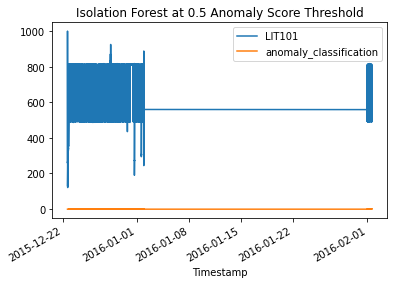

In [117]:
X[['LIT101','anomaly_classification']].plot()
plt.title("Isolation Forest at 0.5 Anomaly Score Threshold")
plt.show() 

/tmp/ipykernel_102/3254890198.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['anomaly_classification_cutoff'] = np.where(X['anomaly_scores']<-0.75,1,0)


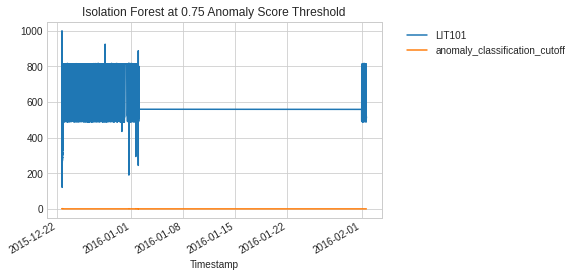

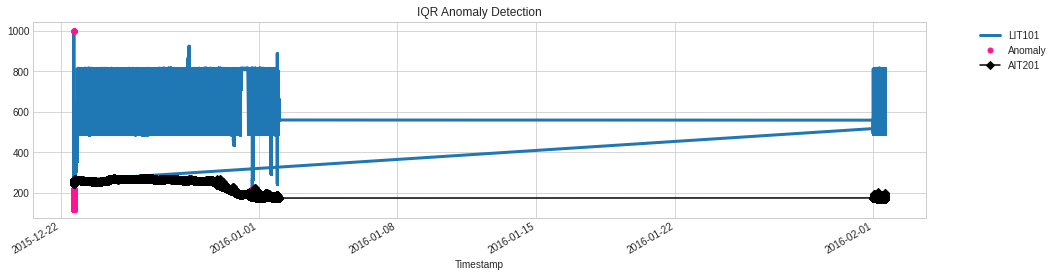

In [126]:
from adtk.detector import InterQuartileRangeAD
from adtk.visualization import plot

X['anomaly_classification_cutoff'] = np.where(X['anomaly_scores']<-0.75,1,0)
X[['LIT101','anomaly_classification_cutoff']].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Isolation Forest at 0.75 Anomaly Score Threshold")

#IQR Methodology using the ADTK Library
iqr_ad = InterQuartileRangeAD(c=1.5) 
anomalies = iqr_ad.fit_detect(df1['LIT101'])
plot(df1['LIT101'], anomaly=anomalies, ts_linewidth=3, ts_markersize=3, anomaly_markersize=5, anomaly_color='deeppink', anomaly_tag="marker")
df1['AIT201'].plot(color='black', marker="D", linewidth=1.5)
plt.title("IQR Anomaly Detection")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show() 

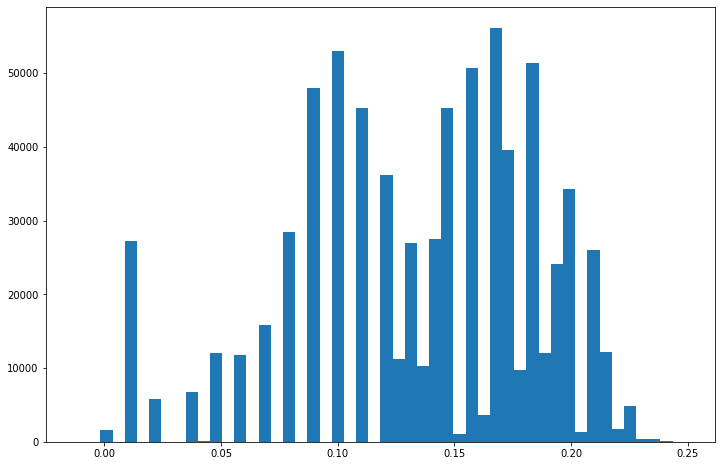

In [83]:
 # Ploting the graph to identify the anomolie score .
plt.figure(figsize=(12, 8))
plt.hist(X_train['scores'] , bins=50);  